<a href="https://colab.research.google.com/github/kylo-dev/gachon-machinelearning/blob/main/7_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 신경망 모델 훈련

In [3]:
# 실행마다 동일한 결과를 얻기 위해 케라스에 랜덤 시드를 사용하고 텐서플로 연산을 결정적으로 만듭니다.
import tensorflow as tf

tf.keras.utils.set_random_seed(42)
tf.config.experimental.enable_op_determinism()

## 손실 곡선

In [2]:
from tensorflow import keras
from sklearn.model_selection import train_test_split

(train_input, train_target), (test_input, test_target) = \
    keras.datasets.fashion_mnist.load_data()

train_scaled = train_input / 255.0

train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42)

4422102/4422102 [==============================] - 0s 0us/step


In [4]:
def model_fn(a_layer=None):
    model = keras.Sequential()
    model.add(keras.layers.Flatten(input_shape=(28, 28)))
    model.add(keras.layers.Dense(100, activation='relu'))
    if a_layer:
        model.add(a_layer)
    model.add(keras.layers.Dense(10, activation='softmax'))
    return model

In [5]:
model = model_fn()

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 100)               78500     
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79510 (310.59 KB)
Trainable params: 79510 (310.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [6]:
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')

history = model.fit(train_scaled, train_target, epochs=5, verbose=0)

In [7]:
print(history.history.keys())

dict_keys(['loss', 'accuracy'])


**손실함수**

* 모델이 주어진 데이터에 대해 예측한 값과 실제 값 사이의 오차(손실)를 최소화하는 함수

* 손실 함수는 모델이 얼마나 잘 예측하는지를 측정하는 데 사용되며, 이 함수의 값을 최소화하려고 모델이 가중치와 편향을 조정합니다.

* 모델의 예측이 실제값과 일치할수록 손실 함수의 값은 작아지게 됩니다.

    * 학습 단계에서 모델은 주어진 데이터에 대해 손실 함수의 값을 최소화하는 방향으로 학습됩니다.

    * 경사 하강법(Gradient Descent)을 사용하여 모델 파라미터(가중치 및 편향)를 조정하면서 손실 함수의 값을 최소화하는 방향으로 나아갑니다

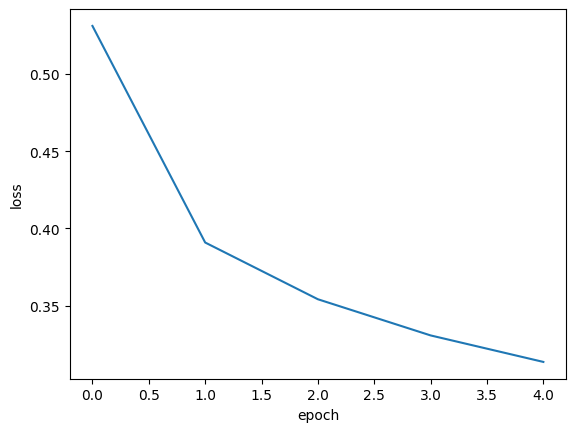

In [8]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

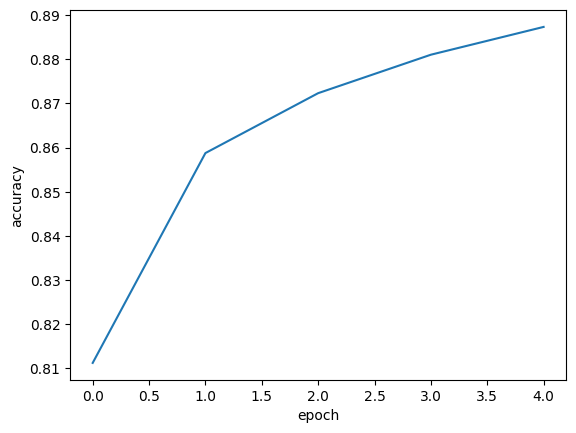

In [9]:
plt.plot(history.history['accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

In [11]:
model = model_fn()
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')

his = model.fit(train_scaled, train_target, epochs=20, verbose=0)

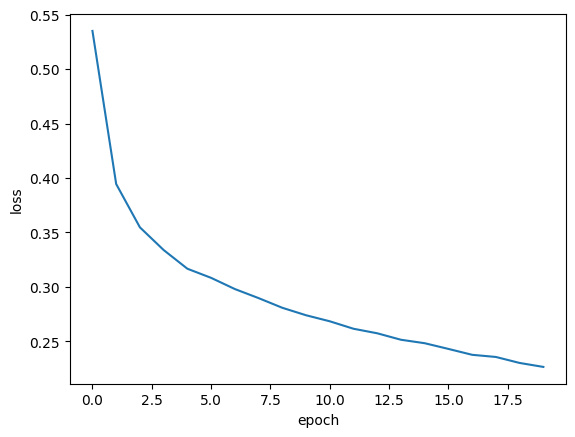

In [14]:
plt.plot(his.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

## 검증 손실

In [15]:
model = model_fn()
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')

history = model.fit(train_scaled, train_target, epochs=20, verbose=0,
                    validation_data=(val_scaled, val_target))

In [16]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


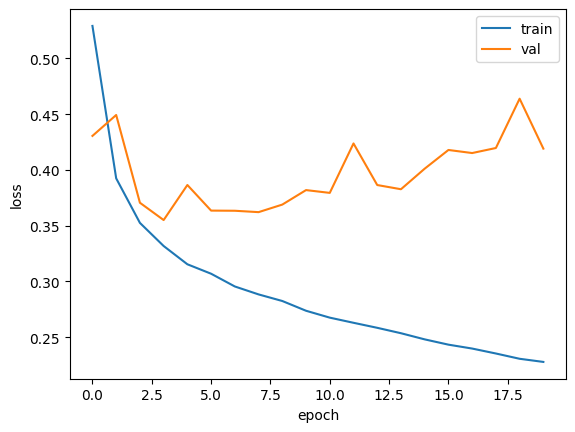

In [17]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

검증 손실은 감소하다가 점점 상승

훈련 손실은 꾸준히 감소하기 때문에 전형적인 과대적합 모델이 만들어짐

검증 손실이 상승하는 시점을 가능한 뒤로 늦추면 검증 세트에 대한 손실이 줄어들 뿐만 아니라 검증 세트에 대한 정확도도 증가함

## 드롭아웃

1. 이전 층의 일부 뉴런이 랜덤하게 꺼지면 특정 뉴런에 과대하게 의존하는 것을 줄일 수 있음

In [18]:
model = model_fn(keras.layers.Dropout(0.3))

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_8 (Dense)             (None, 100)               78500     
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_9 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79510 (310.59 KB)
Trainable params: 79510 (310.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [19]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
              metrics='accuracy')

history = model.fit(train_scaled, train_target, epochs=20, verbose=0,
                    validation_data=(val_scaled, val_target))

은닉층 뒤의 추가된 드롭아웃 층은 훈련되는 모델 파라미터가 없고 입력과 출력의 크기가 같음

단지 일부 뉴런의 출력을 0으로 만듦

훈련이 끝난 뒤에 평가나 예측을 수행할 때는 드롭아웃을 적용하지 않아야 함

> 텐서플로와 케라스는 모델을 평가와 예측에 사용될 때는 자동으로 드롭아웃을 적용하지 않음

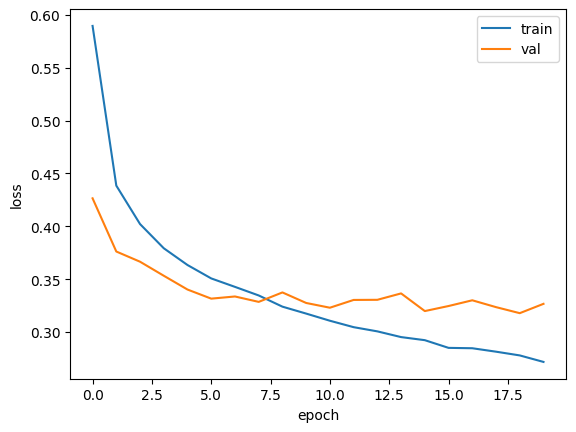

In [20]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

## 모델 저장과 복원

In [21]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
              metrics='accuracy')

history = model.fit(train_scaled, train_target, epochs=10, verbose=0,
                    validation_data=(val_scaled, val_target))

In [22]:
model.save_weights('model-weights.h5')

In [23]:
model.save('model-whole.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [24]:
!ls -al *.h5

-rw-r--r-- 1 root root 333320 Nov  6 02:58 model-weights.h5
-rw-r--r-- 1 root root 981176 Nov  6 02:58 model-whole.h5


In [25]:
model = model_fn(keras.layers.Dropout(0.3))

model.load_weights('model-weights.h5')

In [26]:
import numpy as np

val_labels = np.argmax(model.predict(val_scaled), axis=-1)
print(np.mean(val_labels == val_target))

375/375 [==============================] - 1s 2ms/step
0.8798333333333334


model.predict(val_scaled)

주어진 검증 세트(val_scaled)에 대해 모델이 만든 예측값을 출력합니다.

그리고 np.argmax() 함수를 사용하여 가장 높은 확률을 가진 클래스의 인덱스를 반환합니다.
.
np.argmax(..., axis=-1):

np.argmax() 함수는 주어진 배열에서 가장 큰 값의 인덱스를 찾습니다.

axis=-1는 배열의 마지막 축(열)을 기준으로 가장 큰 값의 인덱스를 찾도록 합니다.

이 경우에는 각 예측 확률이 있는 배열에서 각 샘플마다 확률이 가장 높은 클래스의 인덱스를 찾아냅니다.

---

val_labels == val_target:

각 데이터 샘플에 대해 예측된 라벨(val_labels)과 실제 라벨(val_target)을 비교한 결과를 불리언(boolean) 값으로 반환합니다.

np.mean()

함수는 배열 내 값들의 평균을 계산합니다. 여기서는 불리언 배열이 True는 1로, False는 0으로 변환되어 평균이 계산됩니다.

print(np.mean(val_labels == val_target)):

이를 통해 모델의 검증 데이터에 대한 예측 정확도(맞춘 비율)를 출력합니다.

In [27]:
model = keras.models.load_model('model-whole.h5')

model.evaluate(val_scaled, val_target)

375/375 [==============================] - 3s 7ms/step - loss: 0.3359 - accuracy: 0.8798


[0.3358705937862396, 0.8798333406448364]

## 콜백

In [29]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
              metrics='accuracy')

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.h5',
                                                save_best_only=True)

model.fit(train_scaled, train_target, epochs=20, verbose=0,
          validation_data=(val_scaled, val_target),
          callbacks=[checkpoint_cb])

**ModelCheckpoint 콜백(callback)**

* 훈련 중에 모델의 가중치를 저장하는 기능을 제공합니다.
* 이를 통해 특정 조건을 만족하는 경우에만 모델의 가중치를 저장할 수 있습니다.

주요 매개변수:

* 'best-model.h5': 모델의 가중치를 저장할 파일의 이름을 지정합니다.

* save_best_only=True: True로 설정하면, 가장 좋은 성능을 낸 모델의 가중치만 저장됩니다.

In [30]:
model = keras.models.load_model('best-model.h5')

model.evaluate(val_scaled, val_target)

375/375 [==============================] - 2s 4ms/step - loss: 0.3210 - accuracy: 0.8885


[0.3210257887840271, 0.8884999752044678]

In [31]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
              metrics='accuracy')

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.h5',
                                                save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2,
                                                  restore_best_weights=True)

history = model.fit(train_scaled, train_target, epochs=20, verbose=0,
                    validation_data=(val_scaled, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

EarlyStopping 콜백(callback)

* 훈련 중에 모델의 성능을 모니터링하여, 지정된 조건이 충족될 때 훈련을 조기에 중지하는 기능을 수행합니다.

* 이를 통해 모델이 과적합되는 것을 방지하고, 최적의 성능을 내는 모델을 얻을 수 있습니다.

주요 매개변수:

* patience: 성능 향상을 기다리는 에폭(epoch) 수를 나타냅니다.

    지정된 에폭 수 동안 성능 향상이 없으면 학습을 중지합니다.

* restore_best_weights: True로 설정하면, 성능 향상이 멈춘 후 가장 좋은 성능을 보였을 때의 가중치로 모델을 복원합니다.

In [32]:
print(early_stopping_cb.stopped_epoch)

10


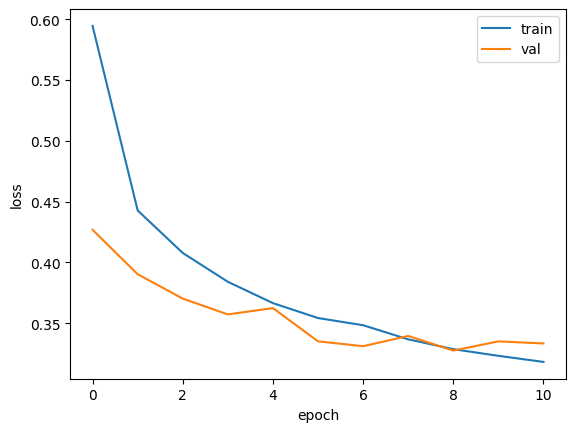

In [33]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()